In [5]:
from sklearn.datasets import load_iris # import the dataset from sklearn
import matplotlib.pyplot as plt

In [6]:
iris = load_iris()
X = iris.data      # shape (150, 4)
y = iris.target    # shape (150,)
print(iris.feature_names, iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


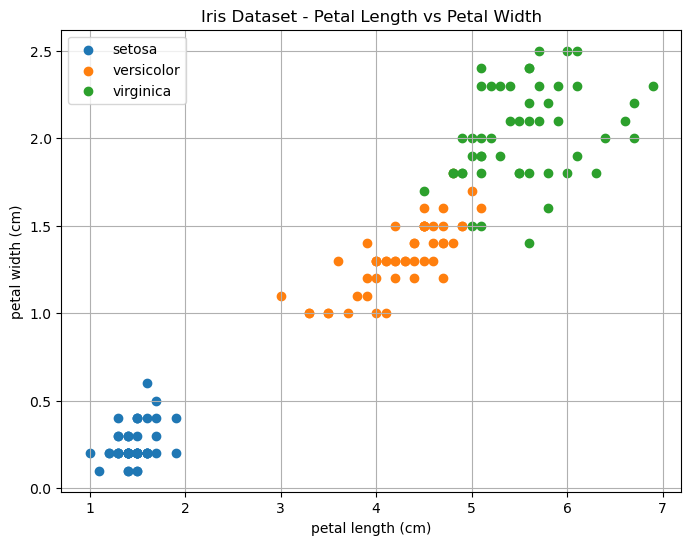

In [25]:
feature_names = iris.feature_names # Access features
target_names = iris.target_names # Access targets
plt.figure(figsize=(8, 6))

for target_class in range(len(target_names)):
    plt.scatter(
        X[y == target_class, 2],  # x-axis: petal length. X[~~~, 2] the 2 says what feature we want and the X states the axis
        X[y == target_class, 3],  # y-axis: petal width. Y[~~~, 3] the 3 says what feature we want and the Y states the axis
        label=target_names[target_class] # labels the point based on index
    )

plt.xlabel(feature_names[2]) # Based on index name the x-axis
plt.ylabel(feature_names[3]) # Based on index name the y-axis
plt.title("Iris Dataset - Petal Length vs Petal Width")
plt.legend()
plt.grid(True)
plt.show()
# This grid helps us understand that setosa will have much smaller petal length and width than the other species. (EDA)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
# initialise decision tree
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state = 42)

In [39]:
# Train decision tree
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [45]:
# initialise and train svc 
from sklearn.svm import SVC
svc_model = SVC(random_state = 42)
svc_model.fit(X_train, y_train)

SVC(random_state=42)

In [47]:
# Predict using the trained models
y_tree_pred = tree_model.predict(X_test)
y_svc_pred = svc_model.predict(X_test)

In [49]:
# Have a look at some of the predictions
print("Tree Predictions:", y_tree_pred[:5])
print("SVC Predictions:", y_svc_pred[:5])
print("True labels:", y_test[:5])

Tree Predictions: [1 0 2 1 1]
SVC Predictions: [1 0 2 1 1]
True labels: [1 0 2 1 1]


In [51]:
# Analyse accuracy
from sklearn.metrics import accuracy_score
tree_accuracy = accuracy_score(y_test, y_tree_pred)
svc_accuracy = accuracy_score(y_test, y_svc_pred)
print("Tree Accuracy:", tree_accuracy)
print("SVC Accuracy:", svc_accuracy)

Tree Accuracy: 1.0
SVC Accuracy: 1.0


In [55]:
# Create and print Confusion Matrix
from sklearn.metrics import confusion_matrix
tree_cm = confusion_matrix(y_test, y_tree_pred)
svc_cm = confusion_matrix(y_test, y_svc_pred)
print("Tree Confusion Matrix:\n", tree_cm)
print("SVC Confusion Matrix:\n", svc_cm)

Tree Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
SVC Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


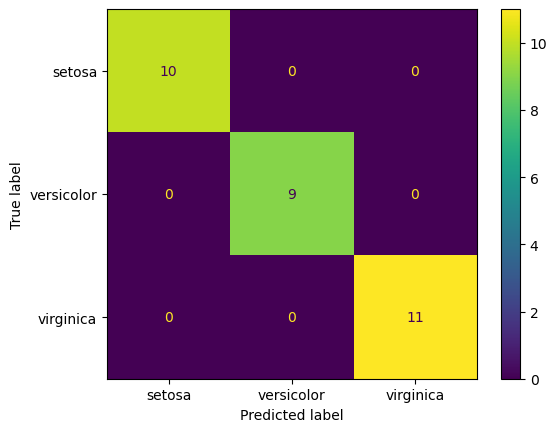

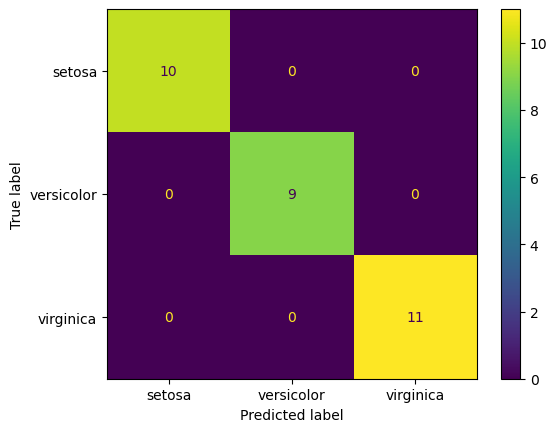

In [57]:
# Print Confusion Matrix more nicely
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=tree_cm, display_labels=iris.target_names)
disp.plot()
disp = ConfusionMatrixDisplay(confusion_matrix=svc_cm, display_labels=iris.target_names)
disp.plot()

In [73]:
# Print percision, recall, and F1-score
from sklearn.metrics import precision_score, recall_score, f1_score
tree_percision = precision_score(y_test, y_tree_pred, average = "macro")
tree_recall = recall_score(y_test, y_tree_pred, average = "macro")
tree_f1 = f1_score(y_test, y_tree_pred, average = "macro")

svc_percision = precision_score(y_test, y_svc_pred, average = "macro")
svc_recall = recall_score(y_test, y_svc_pred, average = "macro")
svc_f1 = f1_score(y_test, y_svc_pred, average = "macro")

# macro = Calculates metrics per class, then takes the unweighted average
# micro = Calculates metrics globally (total TP, FP, FN across all classes)
# weighted = Like macro, but weighs each class by its support (sample count)
# none = Returns score for each class individually

# ideally you can do this in a classification report so you don't need to do calculate each manually 
from sklearn.metrics import classification_report
print("Tree:")
print(classification_report(y_test, y_tree_pred, target_names=iris.target_names))
print("SVC:")
print(classification_report(y_test, y_svc_pred, target_names=iris.target_names))

Tree:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

SVC:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



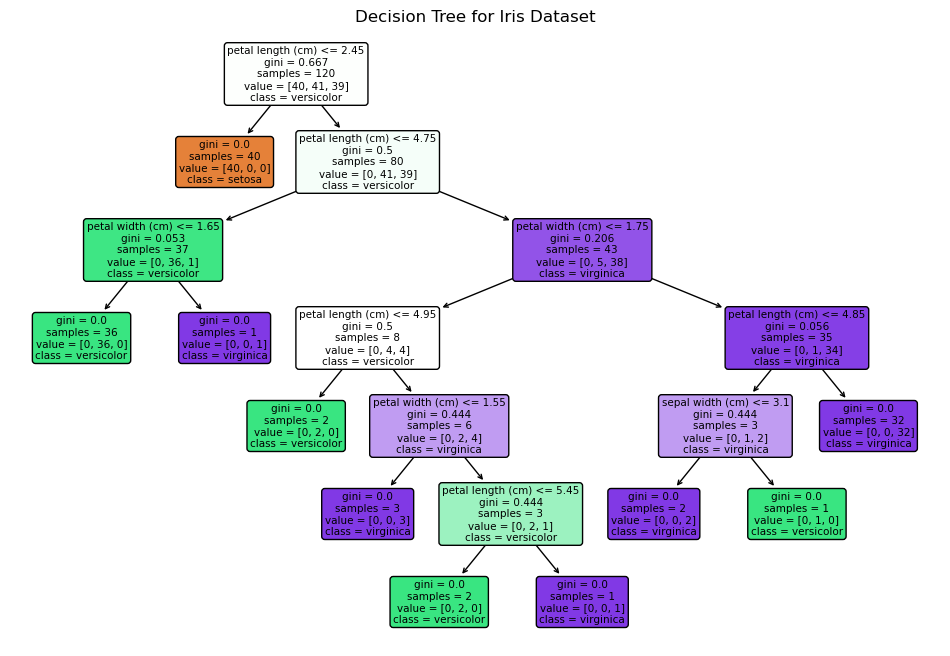

In [79]:
# Visualise the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model,
          feature_names=feature_names,
          class_names=target_names,
          filled=True,
          rounded=True)
plt.title("Decision Tree for Iris Dataset")
plt.show()

In [83]:
# Visualise the most important features
importances = tree_model.feature_importances_
for name, score in zip(feature_names, importances):
    print(f"{name}: {score:.4f}")

sepal length (cm): 0.0000
sepal width (cm): 0.0167
petal length (cm): 0.9061
petal width (cm): 0.0772
